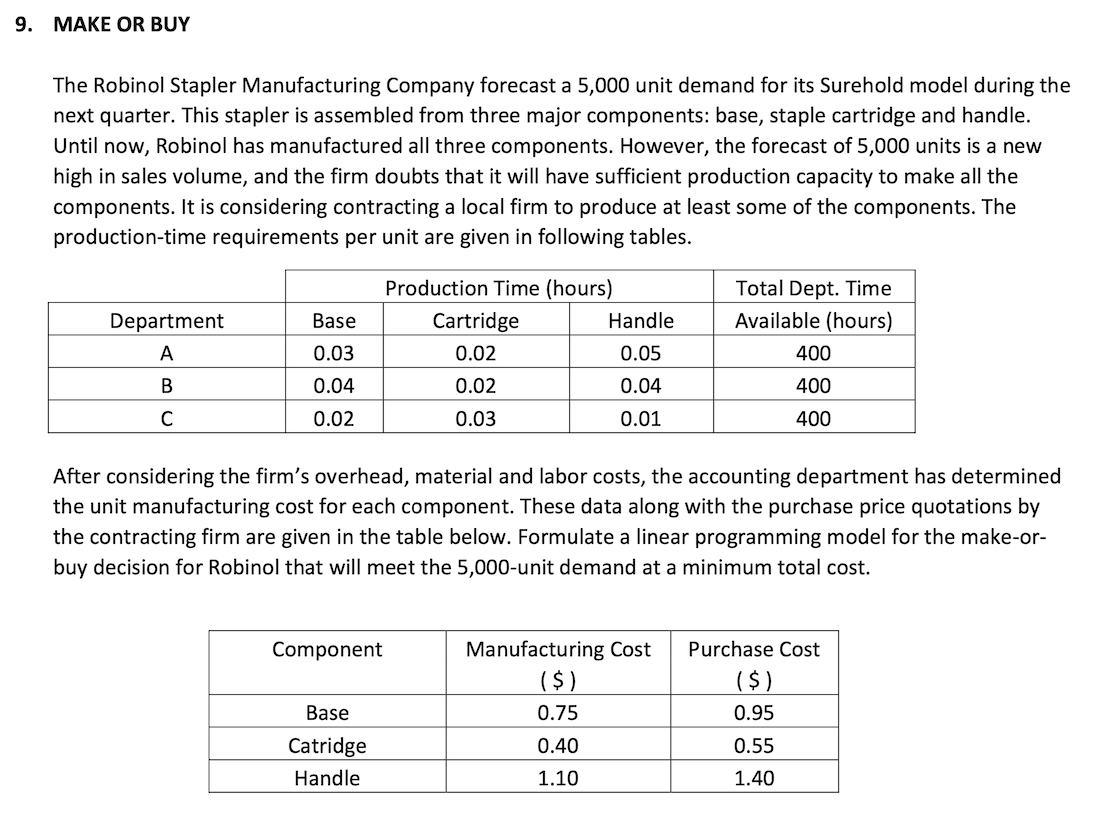

In [1]:
from pulp import *
import pandas as pd

In [6]:
# Create a LP Model
model = LpProblem("Make or Buy", LpMinimize)

# Define decision variables
x1 = LpVariable("Base", lowBound=0, cat='Integer')  # Number of bases to be manufactured in-house
x2 = LpVariable("Cartridge", lowBound=0, cat='Integer')  # Number of cartridges to be manufactured in-house
x3 = LpVariable("Handle", lowBound=0, cat='Integer')  # Number of handles to be manufactured in-house

# Define objective function
model += 0.75 * x1 + 0.40 * x2 + 1.10 * x3 + 0.95 * (5000 - x1) + 0.55 * (5000 - x2) + 1.40 * (5000 - x3)

# Define constraints
model += 0.03 * x1 + 0.04 * x2 + 0.02 * x3 <= 400, 'Department A'
model += 0.02 * x1 + 0.02 * x2 + 0.03 * x3 <= 400, 'Department B'
model += 0.05 * x1 + 0.04 * x2 + 0.01 * x3 <= 400, 'Department C'

print(model)

# Solve the problem
model.solve()

# Print the results
print("Status:", LpStatus[model.status])
print("Number of bases to manufacture in-house:", value(x1))
print("Number of cartridges to manufacture in-house:", value(x2))
print("Number of handles to manufacture in-house:", value(x3))
print("Total cost: $", round(value(model.objective), 2))

Make_or_Buy:
MINIMIZE
-0.19999999999999996*Base + -0.15000000000000002*Cartridge + -0.2999999999999998*Handle + 14500.0
SUBJECT TO
Department_A: 0.03 Base + 0.04 Cartridge + 0.02 Handle <= 400

Department_B: 0.02 Base + 0.02 Cartridge + 0.03 Handle <= 400

Department_C: 0.05 Base + 0.04 Cartridge + 0.01 Handle <= 400

VARIABLES
0 <= Base Integer
0 <= Cartridge Integer
0 <= Handle Integer

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/jason/Documents/GitHub/naut/quantitative_analysis/env/lib/python3.10/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/fb/p1td_8397cg27vvh9njm_gtm0000gn/T/8339d3055fce4e41bbec10d9ebac3f87-pulp.mps -timeMode elapsed -branch -printingOptions all -solution /var/folders/fb/p1td_8397cg27vvh9njm_gtm0000gn/T/8339d3055fce4e41bbec10d9ebac3f87-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 8 COLUMNS
At line 27 RHS
At line 31 BOUNDS
At line 35 ENDATA
Problem MODEL has 3 rows